# **Pencarian Jalur dengan Fungsi Heuristic Menggunakan A***

**Langkah 1 : Menentukan Algoritma A* dulu**

In [ ]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

def a_star(grid, start, goal):
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    open_list = []
    heapq.heappush(open_list, (0, start))

    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    came_from = {}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            if 0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0]) and grid[neighbor[0]][neighbor[1]] == 0:
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None

**Langkah 2 : Tentukan Fungsi Visualisasi**

In [ ]:
def visualize_path(grid, path, start, goal):
  grid = np.array(grid)
  for (x, y) in path:
    grid[x, y] = 2 #mark the path
  grid[start[0], start[1]] = 3 #mark the start
  grid[goal[0], goal[1]] = 4 #mark the goal

  cmap = plt.cm.get_cmap('Accent', 5)

  bounds = [0,1,2,3,4]
  norm = plt.Normalize(vmin=0, vmax=4)

  plt.imshow(grid, cmap=cmap, norm=norm)
  plt.colorbar(ticks=[0,1,2,3,4], format=plt.FuncFormatter(lambda val, loc: ['Empty', 'Obstacle', 'Path', 'Start', 'Goal'][int(val)]))

  plt.show()

**Langkah 3 : Tentukan Grid Awal dan Posisi Awal/Tujuan**

In [ ]:
grid = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
]

start = (0, 0)
goal = (9, 9)

**Langkah 4 : Jalankan Algoritma A* dan Visualisasikan Jalurnya**

Jalur ditemukan: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


<ipython-input-20-2387a029783f>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Accent', 5)


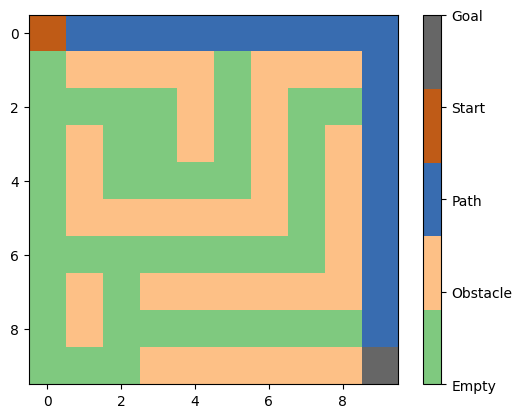

In [ ]:
path = a_star(grid, start, goal)

if path:
    print("Jalur ditemukan:", path)
    visualize_path(grid, path, start, goal)
else:
    print("Tidak ada jalur yang ditemukan")

**TUGAS A**

---

Dari kasus diatas, terdapat kotak/grid 10x10 dengan mencari jalur terpendek dengan nilai jalur yang ditemukan adalah [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)].
Pada kasus tersebut menggunakan algoritma heuristic Manhattan untuk memperkirakan jarak dari suatu titik ke tujuan dengan menerapkan fungsi a_star(grid, start, goal) untuk mencari jalur optimal dari titik start sampai mencapai goalsnya. Memvisualisasikan jalurnya menggunakan matplotlib.




# **Studi Kasus: Pencarian Jalur Terpendek di Peta Kota Menggunakan A***

**Deskripsi Kasus**
Seorang kurir ingin mengantarkan paket dari kantor pusat (Start) ke tujuan (Goal) di sebuah kota yang direpresentasikan sebagai grid.
Kota memiliki:

1.   Jalan bebas hambatan (bisa dilewati, dilambangkan dengan 0).
2.   Bangunan atau area terlarang (tidak bisa dilewati, dilambangkan dengan 1).
3.   Tantangan tambahan berupa jalan berbatu yang memperlambat perjalanan (dilambangkan dengan 2).

Kurir harus menggunakan algoritma A* untuk menemukan jalur tercepat.

Jalur ditemukan: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (6, 8), (7, 8), (8, 8), (8, 9), (9, 9)]


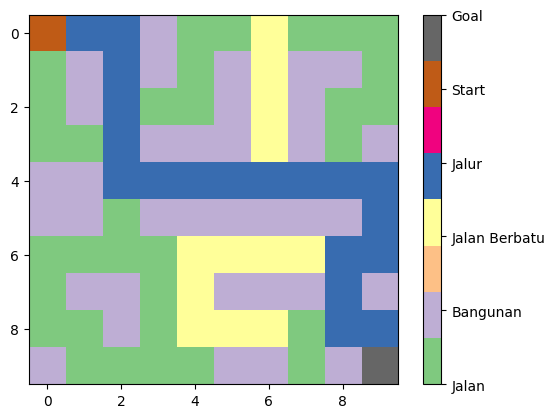

In [ ]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

def a_star(grid, start, goal):
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])  # Manhattan Distance

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
    open_list = []
    heapq.heappush(open_list, (0, start))

    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    came_from = {}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            if 0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0]):
                if grid[neighbor[0]][neighbor[1]] == 1:  # Obstacle
                    continue

                move_cost = 1 if grid[neighbor[0]][neighbor[1]] == 0 else 2  # Jalan biasa: 1, jalan berbatu: 2
                tentative_g_score = g_score[current] + move_cost

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None

def visualize_path(grid, path, start, goal):
    grid = np.array(grid)
    for (x, y) in path:
        grid[x, y] = 3  # Path
    grid[start[0], start[1]] = 4  # Start
    grid[goal[0], goal[1]] = 5  # Goal

    cmap = plt.colormaps['Accent']
    bounds = [0, 1, 2, 3, 4, 5]
    norm = plt.Normalize(vmin=0, vmax=5)

    plt.imshow(grid, cmap=cmap, norm=norm)
    plt.colorbar(ticks=[0, 1, 2, 3, 4, 5], format=plt.FuncFormatter(lambda val, loc: ['Jalan', 'Bangunan', 'Jalan Berbatu', 'Jalur', 'Start', 'Goal'][int(val)]))
    plt.show()

# Grid Kota (0: Jalan, 1: Bangunan, 2: Jalan Berbatu)
grid = [
    [0, 0, 0, 1, 0, 0, 2, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 2, 1, 1, 0],
    [0, 1, 0, 0, 0, 1, 2, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 2, 1, 0, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 2, 2, 2, 2, 0, 0],
    [0, 1, 1, 0, 2, 1, 1, 1, 0, 1],
    [0, 0, 1, 0, 2, 2, 2, 0, 0, 0],
    [1, 0, 0, 0, 0, 1, 1, 0, 1, 0]
]

start = (0, 0)
goal = (9, 9)

# Jalankan A* dan visualisasi
path = a_star(grid, start, goal)

if path:
    print("Jalur ditemukan:", path)
    visualize_path(grid, path, start, goal)
else:
    print("Tidak ada jalur yang ditemukan.")
